<a href="https://colab.research.google.com/github/laivietanh1986/MachineLearningExperiment/blob/main/Copy_of_keras_for_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist



In [ ]:
# load du lieu cho Mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_val,y_val = X_train[50000:60000,:],y_train[50000:60000]
X_train,y_train=X_train[:50000,:],y_train[:50000]
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


In [ ]:
# reshape lai du lieu cho dung kich thuoc ma keras yeu cau 
# dữ liệu input cho môn hình CNN là 1 tensor 4 chiều (N,W,H,D). trong bài này là ảnh xám nên W=H= 28 , D =1 
# N= số lượng ảnh mỗi lần train . ta thấy shape của X_Train là (N, W,H) ta cần reshape lại là (N,W,H,1)
# thỏa mãn kích thuốc keras  yêu cầu 

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
X_test= X_test.reshape(X_test.shape[0],28,28,1)
print (X_train.shape)

(50000, 28, 28, 1)


In [ ]:
# One  hot encoding label (Y)
# vi du so 5 thanh vectot [0,0,0,0,0,1,0,0,0,0]
y_train = np_utils.to_categorical(y_train,10)
y_val = np_utils.to_categorical(y_val,10)
y_test = np_utils.to_categorical(y_test,10)




 định nghĩa model 
1. Model = Sequence() => cho keras biết là chúng ta sắp xếp các layer để tạo model . ví dụ input > CONV 
 -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT 
2.ở input đầu tiên cần chỉ rõ input shape của anh , input_shape = (W,H,D) ta dùng ảnh xám (28,28) nên input_shape = (28,28,1)
3. khi thêm Convolutional layer ta cần chỉ rõ các tham số K( số lượng layer), kernel size (W,H) , hàm 
activation sử dụng , cấu trúc model.add(Conv2D(K,(W,H),activation='ten_ham_activation'))
4. khi thêm Maxpooling layer cần chỉ rõ size của kernel , model.add(MaxPooling2D(poolSize=(W,H)))
5. Flatten chuyển từ tensor sang vector chỉ cần thêm Flatten layer
6. Để thêm Fully Connected layer (FC) cần chỉ rõ số lượng node trong leyer và hàm activation sử dụng trong layer
cấu trúc model.add(Dense(so_luong_node activation='ten_ham_activate'))

In [5]:
# định nghĩa model 
model = Sequential()
# thêm convolutional layer với 32 kernel , kích thước kernel 3*3 
# dùng hàm sigmoil làm activation và chỉ rõ input_shape cho layer đầu tiên 
model.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(28,28,1)))
# thêm convolutional layer 
model.add(Conv2D(32,(3,3),activation='sigmoid'))
# thêm max pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten layer chuyển từ tensor qua vector 
model.add(Flatten())
# thêm fully connected layer với 128 nodes và dùng hàm sigmoid 
model.add(Dense(128,activation='sigmoid'))
# output layer với 10 node và dùng hàm softmax function chuyển qua xác suất 
model.add(Dense(10,activation='softmax'))


In [6]:
# 6 compile model , chỉ rõ dùng  hàm loss_fuction nào được sử dụng, phương thức dùng tối ưu  hafmg loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [7]:
#7 thực hiện train model với data 
H= model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=10,verbose=1 )

Epoch 1/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.2725 - accuracy: 0.9204 - val_loss: 0.0723 - val_accuracy: 0.9811
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.0613 - accuracy: 0.9822 - val_loss: 0.0502 - val_accuracy: 0.9859
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.0390 - accuracy: 0.9889 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 4/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0586 - val_accuracy: 0.9834
Epoch 5/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.0462 - val_accuracy: 0.9858
Epoch 6/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 7/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0456 -

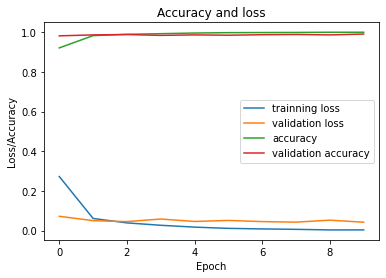

In [14]:
# ve do thi loss , accuracy cua trainning set vaf validation set 
fig = plt.figure()
numOfEpoch = 10 
plt.plot(np.arange(0,numOfEpoch),H.history['loss'],label='trainning loss')
plt.plot(np.arange(0,numOfEpoch),H.history['val_loss'],label='validation loss')
plt.plot(np.arange(0,numOfEpoch),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,numOfEpoch),H.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()


In [15]:
#9 Đánh giá model với dữ liệu test 
score = model.evaluate(X_test,y_test,verbose=0)
print(score)

[0.03378794342279434, 0.9904999732971191]


gia tri du doan  2


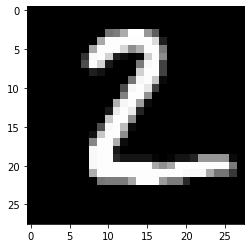

In [16]:
#10 dự đoán anh 
plt.imshow(X_test[1].reshape(28,28),cmap='gray')
y_predict = model.predict(X_test[1].reshape(1,28,28,1))
print('gia tri du doan ',np.argmax(y_predict))